# Teclov Project 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

### Load the companies and rounds data into two data frames and name them companies and rounds2 respectively

In [2]:
companies_data = pd.read_csv('companies.txt',sep='\t', encoding='ANSI')

In [3]:
companies_data.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds_data = pd.read_csv('rounds2.csv',sep=',', encoding='ANSI')

In [6]:
rounds_data.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0


###  How many unique companies are present in rounds2?

In [7]:
rounds_data['company_permalink'] = rounds_data['company_permalink'].str.lower()

In [8]:
rounds_data['company_permalink'].nunique()

66368

There are 66368 unique Companies are present in rrounds2

### How many unique companies are present in companies?

In [9]:
companies_data['permalink'] =companies_data['permalink'].str.lower()

In [10]:
companies_data['permalink'].nunique()

66368

There are 66368 unique Companies are present in Companies

### In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

Company Names column can be used as the unique key for each company

In [11]:
companies_data['company_names'] = companies_data['permalink'].str.replace('/organization/','')
# companies_data['company_names'] = companies_data['company_names'].str.strip('-')


In [12]:
companies_data['company_names'].describe()

count            66368
unique           66368
top       trademarkfly
freq                 1
Name: company_names, dtype: object

In [13]:
companies_data['company_names'].head()

0                    -fame
1                 -qounter
2    -the-one-of-them-inc-
3                  0-6-com
4         004-technologies
Name: company_names, dtype: object

In [14]:
rounds_data['company_names'] = rounds_data['company_permalink'].str.replace('/organization/','')
# rounds_data['company_names'] = rounds_data['company_names'].str.strip('-')


In [15]:
rounds_data['company_names'].describe()

count         114949
unique         66368
top       solarflare
freq              19
Name: company_names, dtype: object

In [16]:
rounds_data['company_names'].head()

0                    -fame
1                 -qounter
2                 -qounter
3    -the-one-of-them-inc-
4                  0-6-com
Name: company_names, dtype: object

### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

## NO

In [17]:
difference1 = set(rounds_data['company_names']).difference(set(companies_data['company_names']))
len(difference1)

0

In [18]:
intersection1 = set(rounds_data['company_names']).intersection(set(companies_data['company_names']))
len(intersection1)

66368

### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [19]:
master_frame  = pd.merge(rounds_data,companies_data)

In [20]:
master_frame.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_names,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-fame,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [21]:
master_frame['company_names'].describe()

count         114949
unique         66368
top       solarflare
freq              19
Name: company_names, dtype: object

In [22]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
company_names                  0
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

###  Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

In [29]:
master_frame = master_frame[master_frame['raised_amount_usd'].between(5000000,15000001)]

In [30]:
most_representative = master_frame.groupby('funding_round_type')['raised_amount_usd'].describe()

In [31]:
fund_types = (master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'seed')|  (master_frame['funding_round_type'] == 'angel')|  (master_frame['funding_round_type'] == 'private_equity')

data_fund =master_frame[fund_types]
#                                                            

In [32]:
most_repres_value = data_fund.groupby('funding_round_type')['raised_amount_usd'].sum()

In [33]:
most_repres_value = most_repres_value.reset_index()

In [34]:
most_repres_value

,funding_round_type,raised_amount_usd
0,angel,5.192895e+08
1,private_equity,3.982620e+09
2,seed,1.341915e+09
3,venture,1.475772e+11


The most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)  IS Venture FUND type

In [36]:
fund_type_venture = data_fund['funding_round_type'] == 'venture'
data_venture = data_fund[fund_type_venture]
data_venture.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_names,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-fame,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,0xdata,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1-mainstream,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012


In [37]:
data_venture_countries = data_venture.groupby('country_code')['raised_amount_usd'].sum().reset_index()
data_venture_countries.head()

,country_code,raised_amount_usd
0,ARE,61250000.0
1,ARG,78699784.0
2,ARM,7730000.0
3,AUS,516989729.0
4,AUT,112519909.0


In [39]:
top_9_countries = data_venture_countries.sort_values('raised_amount_usd',ascending=False).head(9)

In [40]:
top_9_countries

,country_code,raised_amount_usd
71,USA,1.085613e+11
25,GBR,5.451844e+09
14,CHN,5.016561e+09
11,CAN,3.647010e+09
31,IND,2.976544e+09
34,ISR,2.840306e+09
24,FRA,2.112425e+09
18,DEU,1.765026e+09
64,SWE,6.550407e+08


### Identify the top three English-speaking countries in the data frame top9.

In [41]:
top_3_countries = ['USA','IND','GBR']

In [43]:
top3_country = top_9_countries[top_9_countries['country_code'].isin(top_3_countries)]

In [44]:
top3_country

,country_code,raised_amount_usd
71,USA,1.085613e+11
25,GBR,5.451844e+09
31,IND,2.976544e+09


In [116]:
mapping_data.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [117]:
mapping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


### Extract the primary sector of each category list from the category_list column

In [45]:
data_venture['category_list'] = data_venture['category_list'].str.split('|').str[0]


C:\Users\Data Science.DESKTOP-2NH7VUI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
data_venture['category_list'].value_counts().head()

Biotechnology          1873
Software               1352
Advertising             853
Enterprise Software     748
Analytics               599
Name: category_list, dtype: int64

### Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [47]:
mapping_data = pd.read_csv('mapping.csv')

In [48]:
mapping_data = pd.melt(mapping_data,id_vars=['category_list'])
mapping_data = mapping_data[mapping_data.value != 0]

In [49]:
mapping_data = mapping_data.drop('value', axis=1)
mapping_data.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)

In [50]:
mapping_data.tail()

,primary_sector,main_sector
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"
6167,Venture Capital,"Social, Finance, Analytics, Advertising"


In [51]:
data_venture = pd.merge(data_venture,mapping_data,left_on='category_list',right_on='primary_sector')

In [52]:
len(data_venture)

15417

In [53]:
data_venture = data_venture[data_venture['raised_amount_usd'].between(5000000,15000001)]

In [55]:
len(data_venture)

15417

### find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

In [57]:
top3_data = data_venture[data_venture['country_code'].isin(top_3_countries)]

In [58]:
len(top3_data)

12123

In [59]:
top3_data.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_names,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
15408,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,A,24-01-2001,8250000.0,user-interface,/organization/user-interface,User Interface,http://www.userinterface.com,User Interface,operating,USA,CA,Bakersfield,California City,NaN,User Interface,Others
15409,/organization/vector-watch,/funding-round/b010e14f723a45d5c8fadb5a857c620b,venture,NaN,25-11-2015,5000000.0,vector-watch,/organization/vector-watch,Vector Watch,http://www.vectorwatch.com/,Watch,operating,GBR,H9,London,London,01-01-2013,Watch,Others
15412,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,A,09-06-2014,10500000.0,washio,/organization/washio,Washio,http://www.getwashio.com,Service Industries,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,Service Industries,Others
15414,/organization/yapta,/funding-round/2bef2981d0db9747630882cc91e42ba5,venture,NaN,20-07-2011,5000000.0,yapta,/organization/yapta,Yapta,http://www.yapta.com,Tracking,operating,USA,WA,Seattle,Seattle,01-07-2007,Tracking,Others
15415,/organization/yoga-works,/funding-round/8092347fd1f3c15d711d89351154413f,venture,B,31-08-2007,13000000.0,yoga-works,/organization/yoga-works,Yoga Works,http://www.yogaworks.com,Exercise,acquired,USA,CA,Los Angeles,Santa Monica,01-01-1987,Exercise,Health


In [60]:
d1= top3_data[top3_data['country_code']=='USA']

In [61]:
d2= top3_data[top3_data['country_code']=='IND']

In [62]:
d3= top3_data[top3_data['country_code']=='GBR']

### Total number of investments in each countries

In [63]:
len(d1),len(d2),len(d3)

(11237, 301, 585)

### USA main sectors highest investments

In [64]:
dd1 = d1.pivot_table(index='main_sector',values='raised_amount_usd',aggfunc={'count','sum'})
dd1.sort_values('sum',ascending=False)

,count,sum
main_sector,,
Others,2923,2.608928e+10
Cleantech / Semiconductors,2298,2.119600e+10
"Social, Finance, Analytics, Advertising",1912,1.668070e+10
"News, Search and Messaging",1563,1.379682e+10
Health,908,8.200859e+09
Manufacturing,800,7.273553e+09
Entertainment,580,5.000213e+09
Automotive & Sports,167,1.454104e+09
Blanks,86,7.647633e+08


### Total amount of investment inUSA

In [65]:
d1.raised_amount_usd.sum()

100456287843.0

## IND main sectors highest investments

In [66]:
dd2 = d2.pivot_table(index='main_sector',values='raised_amount_usd',aggfunc={'count','sum'})
dd2.sort_values('sum',ascending=False)

,count,sum
main_sector,,
Others,109,1.007410e+09
"News, Search and Messaging",52,4.338345e+08
"Social, Finance, Analytics, Advertising",32,2.905435e+08
Entertainment,33,2.808300e+08
Manufacturing,21,2.009000e+08
Health,19,1.677400e+08
Cleantech / Semiconductors,20,1.653800e+08
Automotive & Sports,13,1.369000e+08
Blanks,2,2.700000e+07


## Total amount of investment in IND

In [67]:
d2.raised_amount_usd.sum()

2710537552.0

## GBR main sectors highest investments

In [68]:
dd3 = d3.pivot_table(index='main_sector',values='raised_amount_usd',aggfunc={'count','sum'})
dd3.sort_values('sum',ascending=False)

,count,sum
main_sector,,
Others,144,1.264124e+09
Cleantech / Semiconductors,127,1.136905e+09
"Social, Finance, Analytics, Advertising",98,8.218884e+08
"News, Search and Messaging",73,6.157462e+08
Entertainment,54,4.615111e+08
Manufacturing,42,3.619403e+08
Health,24,2.145375e+08
Automotive & Sports,16,1.670516e+08
Blanks,7,5.776485e+07


## Total amount of investment in GBR

In [69]:
d3.raised_amount_usd.sum()

5101469207.0

### For the top sector count-wise  which company received the highest investment? USA

In [70]:
d1[d1['main_sector']=='Others'].groupby('company_names')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_names
virtustream            64300000.0
capella                54968051.0
airtight-networks      54201907.0
decarta                52100000.0
black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [71]:
d1[d1['main_sector']=='Cleantech / Semiconductors'].groupby('company_names')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_names
biodesix         75300000.0
tigo-energy      68739496.0
forsight-labs    61300001.0
rheonix          56124758.0
scienergy        55375423.0
Name: raised_amount_usd, dtype: float64

### For the top sector count-wise (point 3), which company received the highest investment? IND

In [72]:
d2[d2['main_sector']=='Others'].groupby('company_names')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_names
firstcry-com        39000000.0
myntra              38000000.0
commonfloor         32900000.0
pepperfry-com       28000000.0
itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [73]:
d2[d2['main_sector']=='News, Search and Messaging'].groupby('company_names')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_names
gupshup-technology-india-pvt-ltd    33000000.0
imimobile                           23000000.0
sms-gupshup                         22000000.0
hike                                21000000.0
roadrunnr                           21000000.0
Name: raised_amount_usd, dtype: float64

## PLOTTING

### 1.A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Teclov.

In [76]:
most_repres_value

,funding_round_type,raised_amount_usd
0,angel,5.192895e+08
1,private_equity,3.982620e+09
2,seed,1.341915e+09
3,venture,1.475772e+11


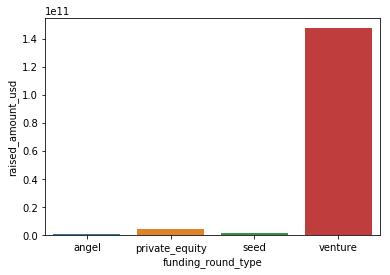

In [78]:
sb.barplot(most_repres_value['funding_round_type'],most_repres_value['raised_amount_usd'])

### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [79]:
top_9_countries

,country_code,raised_amount_usd
71,USA,1.085613e+11
25,GBR,5.451844e+09
14,CHN,5.016561e+09
11,CAN,3.647010e+09
31,IND,2.976544e+09
34,ISR,2.840306e+09
24,FRA,2.112425e+09
18,DEU,1.765026e+09
64,SWE,6.550407e+08


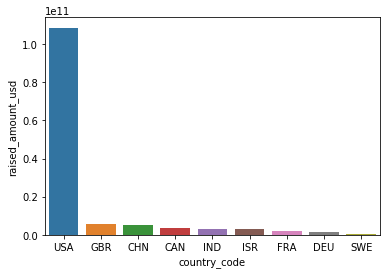

In [81]:
sb.barplot(top_9_countries['country_code'],top_9_countries['raised_amount_usd'])

In [83]:
top3_country

,country_code,raised_amount_usd
71,USA,1.085613e+11
25,GBR,5.451844e+09
31,IND,2.976544e+09


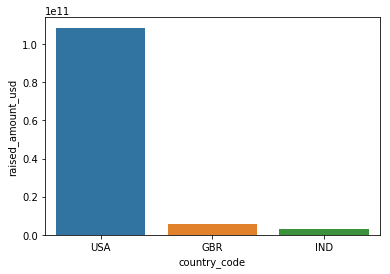

In [84]:
sb.barplot(top3_country['country_code'],top3_country['raised_amount_usd'])

## A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

## FOR USA

In [85]:
dd1.reset_index(inplace=True)

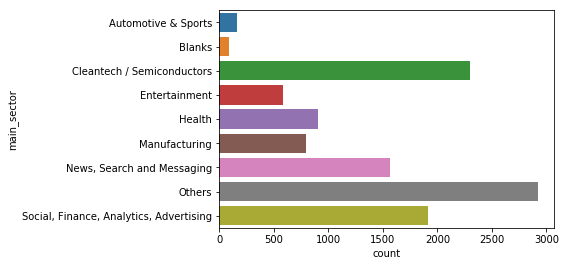

In [86]:
sb.barplot(dd1['count'],dd1['main_sector'])

## FOR IND

In [87]:
dd2.reset_index(inplace=True)

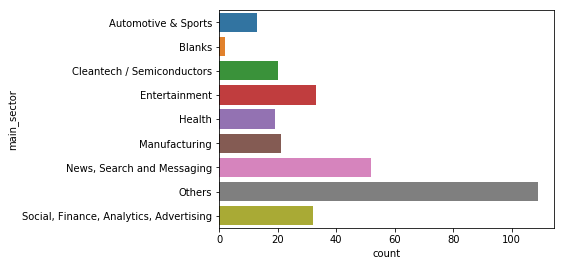

In [88]:
sb.barplot(dd2['count'],dd2['main_sector'])

## FOR GBR

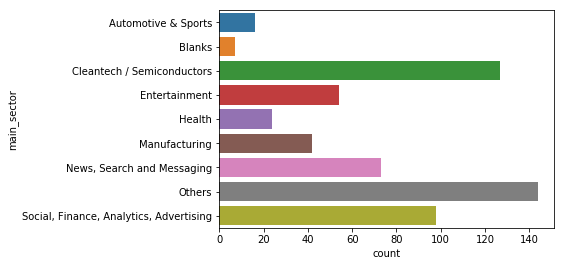

In [89]:
dd3.reset_index(inplace=True)
sb.barplot(dd3['count'],dd3['main_sector'])

## top 3 sectors of top 3 countries respectively

In [90]:
d_usa = dd1.sort_values('count',ascending=False).head(3)

In [91]:
d_usa

,main_sector,count,sum
7,Others,2923,2.608928e+10
2,Cleantech / Semiconductors,2298,2.119600e+10
8,"Social, Finance, Analytics, Advertising",1912,1.668070e+10


In [92]:
d_ind = dd2.sort_values('count',ascending=False).head(3)

In [93]:
d_gbr = dd3.sort_values('count',ascending=False).head(3)

In [94]:
ddds = pd.concat([d_usa,d_ind,d_gbr])

In [95]:
ddds

,main_sector,count,sum
7,Others,2923,2.608928e+10
2,Cleantech / Semiconductors,2298,2.119600e+10
8,"Social, Finance, Analytics, Advertising",1912,1.668070e+10
7,Others,109,1.007410e+09
6,"News, Search and Messaging",52,4.338345e+08
3,Entertainment,33,2.808300e+08
7,Others,144,1.264124e+09
2,Cleantech / Semiconductors,127,1.136905e+09
8,"Social, Finance, Analytics, Advertising",98,8.218884e+08


In [96]:
ddds['countries'] = ['USA','USA','USA','IND','IND','IND',"GBR",'GBR','GBR']

In [97]:
ddds.set_index('countries')

,main_sector,count,sum
countries,,,
USA,Others,2923,2.608928e+10
USA,Cleantech / Semiconductors,2298,2.119600e+10
USA,"Social, Finance, Analytics, Advertising",1912,1.668070e+10
IND,Others,109,1.007410e+09
IND,"News, Search and Messaging",52,4.338345e+08
IND,Entertainment,33,2.808300e+08
GBR,Others,144,1.264124e+09
GBR,Cleantech / Semiconductors,127,1.136905e+09
GBR,"Social, Finance, Analytics, Advertising",98,8.218884e+08


In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

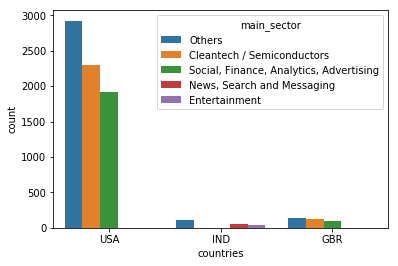

In [99]:
sb.barplot(y=ddds['count'],hue=ddds['main_sector'],x=ddds['countries'])
